In [173]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np 
import pandas as pd
import pickle

In [174]:
df=pd.read_csv(r"C:\Users\GIRIRAJ ROY\Downloads\cStick.csv")

In [175]:
df.head(10)

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,61.080,87.770,1.0,1
1,2.595,2.0,110.190,20.207,65.190,1.0,2
2,68.067,0.0,87.412,79.345,99.345,0.0,0
3,13.090,1.0,92.266,36.180,81.545,1.0,1
4,69.430,0.0,89.480,80.000,99.990,0.0,0
5,27.160,1.0,102.584,64.320,88.580,1.0,1
6,57.134,0.0,70.824,73.690,93.690,0.0,0
7,66.356,0.0,84.816,78.460,98.460,0.0,0
8,60.382,0.0,75.752,75.370,95.370,0.0,0
9,23.170,1.0,99.658,56.340,86.585,1.0,1


In [176]:
df.shape

(2039, 7)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Distance       2039 non-null   float64
 1   Pressure       2039 non-null   float64
 2   HRV            2039 non-null   float64
 3   Sugar level    2039 non-null   float64
 4   SpO2           2039 non-null   float64
 5   Accelerometer  2039 non-null   float64
 6   Decision       2039 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 111.6 KB


In [178]:
df.duplicated().sum()

0

In [179]:
df1=df.copy()

In [180]:
df1.head()

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,61.080,87.770,1.0,1
1,2.595,2.0,110.190,20.207,65.190,1.0,2
2,68.067,0.0,87.412,79.345,99.345,0.0,0
3,13.090,1.0,92.266,36.180,81.545,1.0,1
4,69.430,0.0,89.480,80.000,99.990,0.0,0


In [181]:
df['Accelerometer'].unique()

array([1., 0.])

In [182]:
df['Decision '].unique()

array([1, 2, 0], dtype=int64)

In [183]:
df1

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,61.080,87.770,1.0,1
1,2.595,2.0,110.190,20.207,65.190,1.0,2
2,68.067,0.0,87.412,79.345,99.345,0.0,0
3,13.090,1.0,92.266,36.180,81.545,1.0,1
4,69.430,0.0,89.480,80.000,99.990,0.0,0
...,...,...,...,...,...,...,...
2034,5.655,2.0,116.310,162.242,71.310,1.0,2
2035,9.660,2.0,124.320,177.995,79.320,1.0,2
2036,15.220,1.0,93.828,40.440,82.610,1.0,1
2037,9.120,2.0,123.240,175.871,78.240,1.0,2


In [184]:
df1.drop(columns=['Sugar level','Pressure','Distance'],inplace=True)

In [185]:
df1.head(20)

,HRV,SpO2,Accelerometer,Decision
0,101.396,87.770,1.0,1
1,110.190,65.190,1.0,2
2,87.412,99.345,0.0,0
3,92.266,81.545,1.0,1
4,89.480,99.990,0.0,0
5,102.584,88.580,1.0,1
6,70.824,93.690,0.0,0
7,84.816,98.460,0.0,0
8,75.752,95.370,0.0,0
9,99.658,86.585,1.0,1


In [186]:
x=df1.drop(columns=['Decision '])

In [187]:
x

,HRV,SpO2,Accelerometer
0,101.396,87.770,1.0
1,110.190,65.190,1.0
2,87.412,99.345,0.0
3,92.266,81.545,1.0
4,89.480,99.990,0.0
...,...,...,...
2034,116.310,71.310,1.0
2035,124.320,79.320,1.0
2036,93.828,82.610,1.0
2037,123.240,78.240,1.0


In [188]:
y=df1[['Decision ']]

In [189]:
y.head()

,Decision
0,1
1,2
2,0
3,1
4,0


In [190]:
from sklearn.model_selection import train_test_split

In [191]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [192]:
x_train.head(2)

,HRV,SpO2,Accelerometer
1064,66.248,92.130,0.0
160,95.830,83.975,1.0


In [193]:
x_test.head(2)

,HRV,SpO2,Accelerometer
2011,70.296,93.51,0.0
178,82.088,97.53,0.0


In [194]:
y_train.head(2)

,Decision
1064,0
160,1


In [195]:
y_test.head(2)

,Decision
2011,0
178,0


In [196]:
x_train.shape

(1631, 3)

In [197]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)
with open('scaler_ver2.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('scaler_ver2.pkl', 'rb') as f:
    scaler = pickle.load(f)
x_train_scaled = scaler.transform(x_train)


x_test_scaled = scaler.transform(x_test)


In [198]:
y_train.shape

(1631, 1)

In [199]:
with open('scaler_ver2.pkl', 'rb') as f:
        scaler = pickle.load(f)
#y_train_scaled = scaler.transform(y_train)

In [200]:
with open('scaler_ver2.pkl', 'rb') as f:
        scaler = pickle.load(f)
y_test_scaled = scaler.fit_transform(y_test)



In [201]:
x_train_scaled.shape

(1631, 3)

In [202]:
#y_train_scaled[:10]

In [203]:
x_train_scaled

array([[0.09615266, 0.80345086, 0.        ],
       [0.55140043, 0.59952488, 1.        ],
       [0.08464143, 0.79707427, 0.        ],
       ...,
       [0.76269621, 0.11402851, 1.        ],
       [0.3317944 , 0.9339835 , 0.        ],
       [0.48808864, 0.52938235, 1.        ]])

In [204]:
model=Sequential()

model.add(Dense(64,input_dim=3,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(3,activation='softmax'))

C:\Users\GIRIRAJ ROY\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [205]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [206]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,915 (11.39 KB)

 Trainable params: 2,915 (11.39 KB)

 Non-trainable params: 0 (0.00 B)

In [207]:

history = model.fit(x_train_scaled, y_train, epochs=70)

Epoch 1/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - accuracy: 0.5578 - loss: 1.0039 
Epoch 2/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.9511 - loss: 0.5464
Epoch 3/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 1.0000 - loss: 0.1829
Epoch 4/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 1.0000 - loss: 0.0445
Epoch 5/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 1.0000 - loss: 0.0156
Epoch 6/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 1.0000 - loss: 0.0073
Epoch 7/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 1.0000 - loss: 0.0041
Epoch 8/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 1.0000 - loss: 0.0027
Epoch 9/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 1.0000 - loss: 0.0019
Epoch 10/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 1.0000 - loss: 0.0015
Epoch 11/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 1.0000 - loss: 0.0011   
Epoch 12/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/

In [208]:
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy}')


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 1.0000 - loss: 1.0199e-05
Test Accuracy: 1.0


In [210]:
import pickle

# Specify the filename
filename = 'mlp_model_ver2.pkl'

# Save the model to disk
with open(filename, 'wb') as file:
    pickle.dump(model, file)



In [211]:
# Load the model from disk
with open('mlp_model_ver2.pkl', 'rb') as file:
    loaded_mlp_model = pickle.load(file)

# Use the loaded model to make predictions
predictions = loaded_mlp_model.predict(x_test_scaled)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [212]:
predictions

array([[9.9999690e-01, 2.9393643e-06, 1.7543103e-07],
       [9.9999881e-01, 1.1154619e-06, 6.9212042e-08],
       [7.8996698e-07, 4.4382961e-07, 9.9999869e-01],
       ...,
       [6.0218053e-06, 9.9996662e-01, 2.7380771e-05],
       [3.5760511e-06, 9.9998355e-01, 1.2867664e-05],
       [9.6016174e-07, 1.0707649e-06, 9.9999797e-01]], dtype=float32)

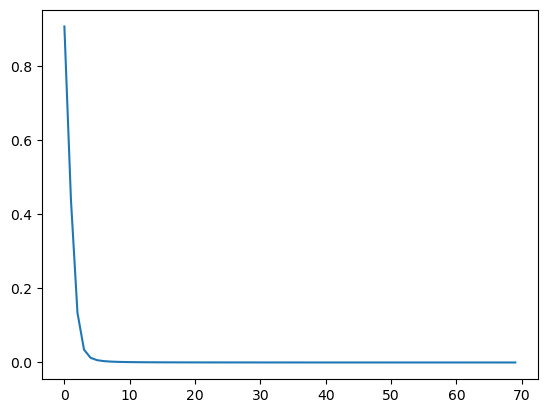

In [213]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])

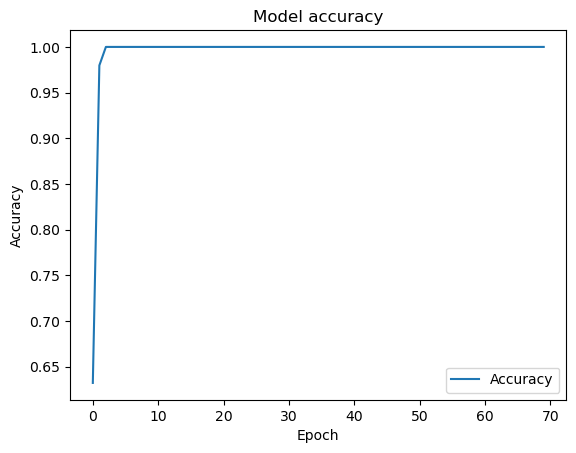

In [214]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy'], loc='lower right')
plt.show()

In [215]:
y_pred=model.predict(x_test_scaled)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [216]:
y_train.head()

,Decision
1064,0
160,1
119,0
591,0
61,2


In [217]:
y_pred[:20]

array([[9.99996901e-01, 2.93936432e-06, 1.75431026e-07],
       [9.99998808e-01, 1.11546194e-06, 6.92120423e-08],
       [7.89966975e-07, 4.43829606e-07, 9.99998689e-01],
       [5.41209101e-06, 9.99971390e-01, 2.32512593e-05],
       [6.62486855e-06, 9.99961615e-01, 3.17606355e-05],
       [9.99999166e-01, 8.93057859e-07, 5.79900039e-08],
       [1.10585609e-06, 2.01416447e-06, 9.99996901e-01],
       [1.75315529e-06, 9.84766120e-06, 9.99988317e-01],
       [9.99997973e-01, 1.89486298e-06, 1.13133034e-07],
       [7.70057625e-07, 3.90496012e-07, 9.99998927e-01],
       [7.25644554e-07, 2.08737205e-07, 9.99999046e-01],
       [9.99999166e-01, 8.75075727e-07, 5.71009728e-08],
       [9.99993205e-01, 6.43243720e-06, 3.68567640e-07],
       [7.27400959e-07, 2.36082471e-07, 9.99999046e-01],
       [4.01478928e-06, 9.99980807e-01, 1.51451977e-05],
       [9.99999285e-01, 7.47987599e-07, 5.06858235e-08],
       [9.99997854e-01, 2.02553520e-06, 1.20982946e-07],
       [9.99998450e-01, 1.37716

In [218]:
y_test.head(20)

,Decision
2011,0
178,0
454,2
410,1
511,1
1943,0
1543,2
487,2
8,0
403,2


In [219]:
x_train_scaled[:10]

array([[0.09615266, 0.80345086, 0.        ],
       [0.55140043, 0.59952488, 1.        ],
       [0.08464143, 0.79707427, 0.        ],
       [0.12120653, 0.81732933, 0.        ],
       [0.7156048 , 0.03750938, 1.        ],
       [0.17266851, 0.84583646, 0.        ],
       [0.7820868 , 0.14553638, 1.        ],
       [0.64484457, 0.70305076, 1.        ],
       [0.57510003, 0.62578145, 1.        ],
       [0.51889812, 0.56351588, 1.        ]])

In [220]:
x_train[:10]

,HRV,SpO2,Accelerometer
1064,66.248,92.130,0.0
160,95.830,83.975,1.0
119,65.500,91.875,0.0
591,67.876,92.685,0.0
61,106.500,61.500,1.0
1301,71.220,93.825,0.0
1077,110.820,65.820,1.0
562,101.902,88.115,1.0
1825,97.370,85.025,1.0
1426,93.718,82.535,1.0


In [221]:
import numpy as np

def convert_to_class(y_pred):
  max_indices = np.argmax(y_pred, axis=1)
  return max_indices


In [222]:
y_true = convert_to_class(y_pred)
print(y_true)

[0 0 2 1 1 0 2 2 0 2 2 0 0 2 1 0 0 0 0 2 1 2 1 0 2 2 1 1 0 1 1 0 2 2 2 2 1
 2 2 2 0 0 0 2 1 2 2 2 2 0 2 2 0 2 2 0 2 1 2 2 2 0 1 0 2 0 0 1 1 1 2 0 2 1
 1 2 0 1 2 0 2 0 0 1 0 2 2 1 0 2 2 2 2 0 0 2 0 0 2 1 2 2 0 1 0 2 1 2 1 1 1
 1 1 2 2 2 0 2 2 0 0 2 0 0 0 2 0 1 2 0 0 0 1 2 2 2 2 0 1 0 2 1 1 1 0 0 0 2
 1 2 0 0 2 1 2 2 2 1 1 1 1 1 2 1 1 0 2 2 1 2 2 2 1 0 1 0 1 0 1 0 2 0 0 2 0
 0 0 0 2 2 1 2 2 1 0 2 0 0 0 1 0 0 1 2 2 1 0 2 2 0 0 1 2 0 0 0 2 0 2 1 1 2
 1 0 2 0 0 0 1 1 2 2 0 1 0 0 2 2 1 2 2 2 0 2 0 0 2 2 2 2 2 1 1 1 0 2 0 1 0
 2 2 2 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 2 1 2 0 1 2 0 0
 1 0 0 2 2 1 1 1 0 0 2 1 0 1 0 0 2 1 2 1 1 1 1 1 1 1 2 1 1 1 0 1 2 0 0 1 2
 1 1 2 2 2 2 1 1 1 0 2 0 1 1 1 2 0 2 0 1 0 2 2 1 1 0 2 1 1 2 0 0 1 2 2 1 1
 0 2 1 1 2 0 1 2 1 0 0 2 0 1 0 0 0 1 1 2 2 0 2 1 2 2 1 1 2 0 1 2 1 1 0 1 1
 2]


In [223]:
y_test[:10]

,Decision
2011,0
178,0
454,2
410,1
511,1
1943,0
1543,2
487,2
8,0
403,2


In [224]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_true)

1.0

In [225]:
model.predict(x_train_scaled[[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[9.9999559e-01, 4.1206226e-06, 2.4367279e-07]], dtype=float32)

In [226]:
model.predict(x_train_scaled)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step


array([[9.9999559e-01, 4.1206226e-06, 2.4367279e-07],
       [4.1164903e-06, 9.9998021e-01, 1.5688842e-05],
       [9.9999535e-01, 4.3974028e-06, 2.5926093e-07],
       ...,
       [7.7115112e-07, 3.9328367e-07, 9.9999893e-01],
       [9.9999869e-01, 1.1633666e-06, 7.1714673e-08],
       [5.8690207e-06, 9.9996781e-01, 2.6324100e-05]], dtype=float32)

In [228]:
import numpy as np
with open('mlp_model_ver2.pkl', 'rb') as file:
    loaded_mlp_model = pickle.load(file)
predictions = loaded_mlp_model.predict(x_test_scaled)

def predict_fall(loaded_mlp_model, input_array):
    with open('scaler_ver2.pkl', 'rb') as f:
        scaler = pickle.load(f)
    input_reshaped = np.array(input_array)
    scaled_input=scaler.transform([input_reshaped]).flatten()
    input_2d=np.array([scaled_input])
    print(scaled_input)
    output=loaded_mlp_model.predict(input_2d)

    return np.argmax(output, axis=1)[0]
    #return output

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [233]:
predict_fall(loaded_mlp_model,[70.296,	93.510,	0.0])

[0.15844875 0.83795949 0.        ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


C:\Users\GIRIRAJ ROY\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0

In [234]:
#x_test_scaled

In [235]:
x_test.head(15)

,HRV,SpO2,Accelerometer
2011,70.296,93.510,0.0
178,82.088,97.530,0.0
454,110.070,65.070,1.0
410,92.618,81.785,1.0
511,90.396,80.270,1.0
1943,85.212,98.595,0.0
1543,115.710,70.710,1.0
487,120.300,75.300,1.0
8,75.752,95.370,0.0
403,109.530,64.530,1.0


In [236]:
y_test.head(3)

,Decision
2011,0
178,0
454,2
